## How to create a list with the y-axis labels of a TreeExplainer shap chart?

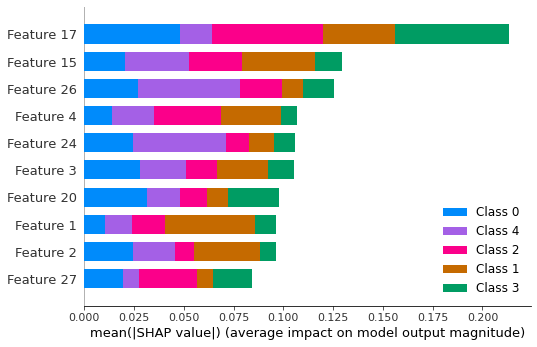

In [4]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from shap import TreeExplainer, summary_plot
import numpy as np
import pandas as pd

X, y = make_classification(n_samples=1000, n_features=30,
          n_classes=5, n_informative=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

explainer = TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_test)
summary_plot(shap_values, max_display=10)

# sv = np.array(shap_values)
# sv_mean=np.abs(sv).mean(1).sum(0)
# order = np.argsort(sv_mean)[::-1]
# ordered_cols = X_test.columns[order]
# print(ordered_cols)

In [5]:
X_importance = X_test
shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X_importance.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

AttributeError: 'numpy.ndarray' object has no attribute 'columns'